# Übung 8 - Logistische Regression

## Einfache logistische Regression

In [1]:
# Hier nutzen wir einmal einen Standard-Datensatz von Scikit-Learn
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [2]:
# Die Feature-Daten sind in iris.data
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Die Zielwerte sind in iris.target
iris.target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [4]:
# Die Bezeichnung der Zielvariablen sind in iris.target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Wählen wir die Daten aus
## Wir versuchen im ersten Schritt mit der petal width die Blume zu klassifizieren
X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica' #da binäre Daten benötigt werden

## Daten in Train- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Skalierung / Standardisierung nicht notwendig

In [6]:
# logistische Modell mit den Daten trainieren
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Vorhersagen können auf zwei Arten gemacht werden

## Wahrscheinlichkeit eines Eingangwerts vorhersagen --> 2 W'keiten für Klasse 0 und 1!
print(model.predict_proba([[0.25]]))

## Klasse eines Eingangswerts vorhersagen
print(model.predict([[0.25]]))

[[0.99596663 0.00403337]]
[False]


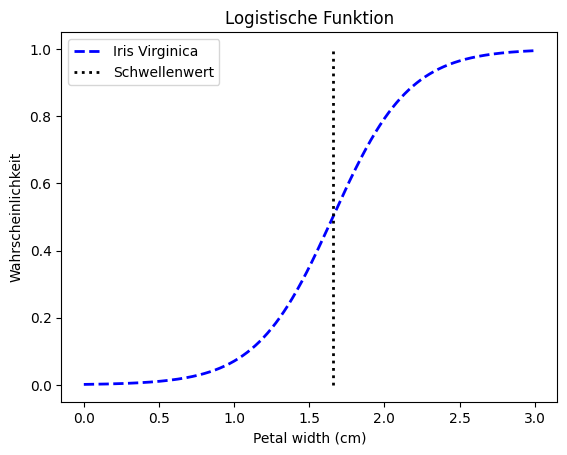

1.6576576576576576


In [8]:
# geschätzte Logistische Funktion plotten
import numpy as np
import matplotlib.pyplot as plt

# X-werte im relevanten Wertebereich generieren und W'keit schätzen
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = model.predict_proba(X_new)

# Daten inkl. Schwellenwert bei 0.5 plotten
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
plt.plot(X_new, y_proba[:,1], "b--", linewidth=2, label="Iris Virginica") #Spalte 1 nehmen, da dort W'keit für True
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2, label="Schwellenwert")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Wahrscheinlichkeit")
plt.title("Logistische Funktion")
plt.show()
print(decision_boundary)